##**STEP 1: IMPORTING LIBRARIES (Necessary)**

In [1]:
#data manipulation and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# handling missing values libraries
from sklearn.impute import SimpleImputer  # For imputation

# feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Time and timing libraries
import datetime
import time

In [3]:

def time_execution(code_block):
    start_time = time.time()
    code_block()
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time:.2f} seconds")


## **STEP 2: LOADING THE DATASET (Raw)**

In [4]:
df=pd.read_csv('Methane.csv')
df.head()




,Reference Number,Publication Title,Publication Authors,Publication Journal,Publication Volume,Publication Pages,Publication Year,Study Location,Experimental Design,Treatment Description,...,"H2/DMI, g/kg SED",H2/DMI g/kg SD,"CO2, g/d",CO2 SEM,CO2 SED,CO2 SD,"CO2/DMI, g/kg","CO2/DMI, g/kg SEM","CO2/DMI, g/kg SED","CO2/DMI, g/kg SD"
0,1,Effects of lauric and myristic acids on rumina...,Hristov et al.,Journal of Dairy Science,94.0,382-395,2011,United States,Latin Square,stearic (control) 240 g/cow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Effects of lauric and myristic acids on rumina...,Hristov et al.,Journal of Dairy Science,94.0,382-395,2011,United States,Latin Square,lauric acid 240 g/cow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Effects of lauric and myristic acids on rumina...,Hristov et al.,Journal of Dairy Science,94.0,382-395,2011,United States,Latin Square,myristic acid 240 g/cow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Rumen fermentation and production effects of O...,"Tekippe, J. A., Hristov, A. N., Heyler, K. S.,...",Journal of Dairy Science,94.0,5065-5079,2011,United States,Crossover,Control,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Rumen fermentation and production effects of O...,"Tekippe, J. A., Hristov, A. N., Heyler, K. S.,...",Journal of Dairy Science,94.0,5065-5079,2011,United States,Crossover,Origanum vulgare L. leaves,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(797, 188)

In [6]:
df.columns

Index(['Reference Number', 'Publication Title', 'Publication Authors',
       'Publication Journal', 'Publication Volume', 'Publication Pages',
       'Publication Year', 'Study Location', 'Experimental Design',
       'Treatment Description',
       ...
       'H2/DMI, g/kg SED', 'H2/DMI g/kg SD', 'CO2, g/d ', 'CO2 SEM', 'CO2 SED',
       'CO2 SD', 'CO2/DMI, g/kg', 'CO2/DMI, g/kg SEM', 'CO2/DMI, g/kg SED',
       'CO2/DMI, g/kg SD'],
      dtype='object', length=188)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Columns: 188 entries, Reference Number to CO2/DMI, g/kg SD
dtypes: float64(143), int64(4), object(41)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Reference Number,Publication Volume,Publication Year,Animals per Treatment,Diet Acclimation Days,Data Collection Days,Total Treatment Days,Animal sex: 1 = Male; 2= Female,ADG SEM,ADG SD,...,"H2/DMI, g/kg SED",H2/DMI g/kg SD,"CO2, g/d",CO2 SEM,CO2 SED,CO2 SD,"CO2/DMI, g/kg","CO2/DMI, g/kg SEM","CO2/DMI, g/kg SED","CO2/DMI, g/kg SD"
count,797.000000,777.000000,797.000000,797.000000,784.000000,788.000000,790.000000,797.000000,47.000000,0.0,...,4.000000,3.00,173.000000,166.000000,4.000000,3.0,88.000000,77.000000,8.000000,3.0
mean,436.289837,92.821107,2013.180678,8.711418,21.883929,13.687817,35.420253,1.987453,0.132464,NaN,...,0.030000,0.02,10509.985549,319.591566,362.750000,1000.0,625.170909,17.137143,34.845000,75.0
std,263.486629,57.299720,8.863991,4.940046,30.897400,24.782695,39.610948,0.111379,0.094659,NaN,...,0.023094,0.00,4375.025855,180.691362,55.829771,0.0,158.114365,9.095514,12.872754,0.0
min,1.000000,1.000000,1971.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.015400,NaN,...,0.010000,0.02,2295.000000,44.270000,314.400000,1000.0,138.000000,3.090000,22.530000,75.0
25%,238.000000,65.000000,2011.000000,5.000000,14.000000,5.000000,21.000000,2.000000,0.071200,NaN,...,0.010000,0.02,6938.000000,203.000000,314.400000,1000.0,569.500000,10.500000,26.182500,75.0
50%,372.000000,96.000000,2016.000000,8.000000,15.000000,7.000000,28.000000,2.000000,0.123000,NaN,...,0.030000,0.02,11700.000000,272.000000,362.750000,1000.0,598.800000,16.100000,31.350000,75.0
75%,704.000000,102.000000,2018.000000,11.000000,21.000000,12.000000,34.000000,2.000000,0.170000,NaN,...,0.050000,0.02,13332.000000,406.000000,411.100000,1000.0,685.400000,18.250000,40.012500,75.0
max,909.000000,636.000000,2022.000000,32.000000,450.000000,291.000000,455.000000,2.000000,0.360000,NaN,...,0.050000,0.02,22279.000000,804.000000,411.100000,1000.0,1043.500000,40.560000,54.150000,75.0


In [7]:
df.isnull().sum()

Reference Number         0
Publication Title        0
Publication Authors      0
Publication Journal      0
Publication Volume      20
                      ... 
CO2 SD                 794
CO2/DMI, g/kg          709
CO2/DMI, g/kg SEM      720
CO2/DMI, g/kg SED      789
CO2/DMI, g/kg SD       794
Length: 188, dtype: int64

## **STEP 3: PREPROCESSING (Dataset cleaning)**

In [8]:
#dropping various columns
df.drop(['Reference Number', 'Publication Title', 'Publication Authors',
       'Publication Journal', 'Publication Volume', 'Publication Pages',
       'Publication Year', 'Experimental Design'], axis=1, inplace=True)

In [9]:
df.drop(['H2/DMI, g/kg SED', 'H2/DMI g/kg SD', 'CO2, g/d ', 'CO2 SEM', 'CO2 SED',
       'CO2 SD', 'CO2/DMI, g/kg', 'CO2/DMI, g/kg SEM', 'CO2/DMI, g/kg SED',
       'CO2/DMI, g/kg SD'], axis=1, inplace=True)

In [10]:
df.shape

(797, 170)

In [11]:
df.columns

Index(['Study Location', 'Treatment Description', 'Treatment Dosage',
       'Treatment Dosage Units', 'Animals per Treatment', 'Treatment Code',
       'Treatment Type', 'Animal Metabolic Status', 'Rumen Cannulation Status',
       'Animal Housing Type',
       ...
       'CH4/ECM,SEM', 'CH4/ECM, SED', 'CH4/ECM, SD', 'CH4/BW Gain g/kg',
       'CH4/BW Gain, g/kg SEM', 'H2, g/d', 'H2 SEM', 'H2 SD', 'H2/DMI g/kg',
       'H2/DMI g/kg SEM'],
      dtype='object', length=170)

In [12]:
df.drop(['Treatment Description', 'Treatment Dosage', 'Treatment Dosage Units',
       'Animals per Treatment', 'Treatment Code', 'Treatment Type','Rumen Cannulation Status',
       'Animal Metabolic Status'], axis=1, inplace=True)

In [13]:
df.drop(['H2, g/d','H2 SEM','H2 SD','H2/DMI g/kg','H2/DMI g/kg SEM'] ,axis=1, inplace=True)

In [16]:
df.drop(['TTDM dig, %', 'TTDM dig SEM', 'TTDM dig SED', 'TTDM dig SD','TTDM dig, %', 'TTOM dig SEM', 'TTOM dig SED', 'TTOM dig SD','TTCP dig, %', 'TTCP dig SEM', 'TTCP dig SED', 'TTCP dig SD', 'TTGE dig SEM', 'TTGE dig SED', 'TTGE dig SD','TTNDF dig, %', 'TTNDF dig SEM', 'TTNDF dig SED', 'TTNDF dig SD','TTADF dig, %', 'TTADF dig SEM', 'TTADF dig SED', 'TTADF dig SD','TTStarch dig, %', 'TTStarch dig SEM', 'TTStarch dig SED', 'Fecal N, g/d','Fecal N SEM', 'Fecal N SED', 'Fecal N SD', 'Urine N, g/d', 'Urine N SEM','Urine N SED', 'Urine N SD', 'Milk N, g/d', 'Milk N SEM', 'Milk N SED','Milk, kg/d', 'Milk SEM', 'Milk SED', 'Milk SD', 'Milk Fat, %', 'Milk Fat SEM','Milk Fat SED', 'Milk Fat SD', 'Milk CP, %', 'Milk CP SEM', 'Milk CP SED','Milk CP SD', 'Milk TP, %', 'Milk TP SEM', 'Milk TP SED', 'Milk TP SD','Milk Lactose, %', 'Milk Lactose SEM', 'Milk Lactose SED', 'Milk Lactose SD','ECM, kg/d', 'ECM SEM', 'ECM SED', 'ECM SD', 'FCM 3.5%, kg/d', 'FCM 3.5% SEM','FCM 4%, kg', 'FCM 4% SEM', 'SCM, kg/d', 'SCM, SEM', 'FPCM, kg/d',
                   'FPCM SEM','FPCM SED', 'FPCM SD', 'MUN, mg/dL', 'MUN SEM', 'MUN SD'], axis=1, inplace=True)

KeyError: "['TTDM dig, %', 'TTDM dig SEM', 'TTDM dig SED', 'TTDM dig SD', 'TTDM dig, %', 'TTOM dig SEM', 'TTOM dig SED', 'TTOM dig SD', 'TTCP dig, %', 'TTCP dig SEM', 'TTCP dig SED', 'TTCP dig SD', 'TTGE dig SEM', 'TTGE dig SED', 'TTGE dig SD', 'TTNDF dig, %', 'TTNDF dig SEM', 'TTNDF dig SED', 'TTNDF dig SD', 'TTADF dig, %', 'TTADF dig SEM', 'TTADF dig SED', 'TTADF dig SD', 'TTStarch dig, %', 'TTStarch dig SEM', 'TTStarch dig SED', 'Fecal N, g/d', 'Fecal N SEM', 'Fecal N SED', 'Fecal N SD', 'Urine N, g/d', 'Urine N SEM', 'Urine N SED', 'Urine N SD', 'Milk N, g/d', 'Milk N SEM', 'Milk N SED', 'Milk, kg/d', 'Milk SEM', 'Milk SED', 'Milk SD', 'Milk Fat, %', 'Milk Fat SEM', 'Milk Fat SED', 'Milk Fat SD', 'Milk CP, %', 'Milk CP SEM', 'Milk CP SED', 'Milk CP SD', 'Milk TP, %', 'Milk TP SEM', 'Milk TP SED', 'Milk TP SD', 'Milk Lactose, %', 'Milk Lactose SEM', 'Milk Lactose SED', 'Milk Lactose SD', 'ECM, kg/d', 'ECM SEM', 'ECM SED', 'ECM SD', 'FCM 3.5%, kg/d', 'FCM 3.5% SEM', 'FCM 4%, kg', 'FCM 4% SEM', 'SCM, kg/d', 'SCM, SEM', 'FPCM, kg/d', 'FPCM SEM', 'FPCM SED', 'FPCM SD', 'MUN, mg/dL', 'MUN SEM', 'MUN SD'] not found in axis"

In [17]:
df.drop(['Animal Housing Type', 'Animal Feeding Type', 'Diet Acclimation Days','Data Collection Days', 'Total Treatment Days', 'Feed Analysis Method','Intake strategy', 'Diet Forage #1', 'Diet Forage #1, % Diet DM','Diet Forage #2', 'Diet forage #2, % Diet DM', 'Diet Forage, %DM','ADG SEM', 'ADG SD', 'Rumen Sampling Method'
], axis=1, inplace=True)

KeyError: "['Animal Housing Type', 'Animal Feeding Type', 'Diet Acclimation Days', 'Data Collection Days', 'Total Treatment Days', 'Feed Analysis Method', 'Intake strategy', 'Diet Forage #1', 'Diet Forage #1, % Diet DM', 'Diet Forage #2', 'Diet forage #2, % Diet DM', 'Diet Forage, %DM', 'ADG SEM', 'ADG SD', 'Rumen Sampling Method'] not found in axis"

In [18]:
df.drop(['Rumen pH SEM', 'Rumen pH SED','Rumen pH SD',  'Rumen Ammonia SEM','Rumen Ammonia SED', 'Rumen Ammonia SD', 'Rumen VFA, mM','Rumen VFA SEM', 'Rumen VFA SD','Rumen Acetate SEM', 'Rumen Acetate SED ','Rumen Acetate SD ','Rumen Propionate SEM', 'Rumen Propionate SED', 'Rumen Propionate  SD','Rumen Butyrate SEM','Rumen Butyrate SED', 'Rumen Butyrate SD'], axis=1, inplace=True)


In [19]:
df.shape

(797, 51)

In [20]:
df.columns

Index(['Study Location', 'Animal sex: 1 = Male; 2= Female',
       'Animal Age (months)', 'Animal BW, kg', 'Methane Measurement Method',
       'DIM', 'ADG, kg/d ', 'Supplemental Feed Ingredients', 'DMI, kg/d',
       'DMI SEM', 'DMI SED', 'DMI SD', 'Diet GE, Mcal/kg DM', 'Diet CP, %DM',
       'Diet Fatty Acids, %DM', 'Diet EE, %DM', 'Diet Ash, %DM',
       'Diet NDF, %DM', 'Diet ADF, %DM', 'Diet Lignin, %DM',
       'Diet Starch, %DM', 'Rumen pH', 'Rumen Ammonia, mM', 'Rumen VFA SED',
       'Rumen Acetate, mol/100 mol', 'Rumen Propionate, mol/100 mol',
       'Rumen Butyrate, mol/100 mol', 'TTOM dig, % ', 'TTGE dig, %',
       'CH4, g/d ', 'CH4 SEM', 'CH4 SED', 'CH4 SD', 'CH4/DMI, g/kg',
       'CH4/DMI, SEM', 'CH4/DMI, SED', 'CH4/DMI, SD', 'CH4, %GEI',
       'CH4, %GEI SEM', 'CH4, %GEI SED', 'CH4, %GEI SD', 'CH4/Milk, g/kg',
       'CH4/Milk,SEM', 'CH4/Milk, SED', 'CH4/Milk, SD', 'CH4/ECM, g/kg',
       'CH4/ECM,SEM', 'CH4/ECM, SED', 'CH4/ECM, SD', 'CH4/BW Gain g/kg',
       'CH4/

In [31]:
df.shape

(797, 34)

In [22]:
df.to_csv('DairyMethane Dataset.csv', index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


## filling null columns

In [23]:
df=pd.read_csv('DairyMethane Dataset.csv')
df.head()

,Study Location,Animal sex: 1 = Male; 2= Female,Animal Age (months),"Animal BW, kg",Methane Measurement Method,DIM,"ADG, kg/d",Supplemental Feed Ingredients,"DMI, kg/d",DMI SEM,...,"CH4/Milk, g/kg","CH4/Milk,SEM","CH4/Milk, SED","CH4/Milk, SD","CH4/ECM, g/kg","CH4/ECM,SEM","CH4/ECM, SED","CH4/ECM, SD",CH4/BW Gain g/kg,"CH4/BW Gain, g/kg SEM"
0,United States,2,NaN,672,Sulfur Hexafluoride (SF6) tracer technique,95,NaN,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",26.9,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2,NaN,665,Sulfur Hexafluoride (SF6) tracer technique,95,NaN,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",20.0,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2,NaN,661,Sulfur Hexafluoride (SF6) tracer technique,95,NaN,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",25.7,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,NaN,corn ground/canola meal/Bakery/Cottonseed Hull...,26.7,3.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,NaN,corn ground/canola meal/Bakery/Cottonseed Hull...,26.0,3.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.shape

(797, 51)

In [25]:
df.isnull().sum()

Study Location                       0
Animal sex: 1 = Male; 2= Female      0
Animal Age (months)                654
Animal BW, kg                      114
Methane Measurement Method           0
DIM                                211
ADG, kg/d                          746
Supplemental Feed Ingredients      111
DMI, kg/d                            0
DMI SEM                            113
DMI SED                            724
DMI SD                             755
Diet GE, Mcal/kg DM                427
Diet CP, %DM                        94
Diet Fatty Acids, %DM              775
Diet EE, %DM                       253
Diet Ash, %DM                      251
Diet NDF, %DM                      117
Diet ADF, %DM                      359
Diet Lignin, %DM                   671
Diet Starch, %DM                   397
Rumen pH                           496
Rumen Ammonia, mM                  524
Rumen VFA SED                      772
Rumen Acetate, mol/100 mol         467
Rumen Propionate, mol/100

In [26]:
df.drop(['Diet Fatty Acids, %DM','CH4/ECM, SED','CH4/BW Gain, g/kg SEM','CH4/BW Gain g/kg','CH4/ECM, SD','CH4/ECM, SED','CH4/ECM,SEM'], axis=1, inplace=True)

In [27]:
df.drop(['CH4/ECM, g/kg','CH4/Milk, SD','CH4/Milk, SED','CH4/Milk,SEM','CH4, %GEI SD','CH4, %GEI SED','CH4/DMI, SD','CH4/DMI, SED','CH4/DMI, SEM','CH4 SD'], axis=1, inplace=True)

In [28]:
df.drop(['CH4 SED'], axis=1, inplace=True)

In [32]:
df.columns

Index(['Study Location', 'Animal sex: 1 = Male; 2= Female',
       'Animal Age (months)', 'Animal BW, kg', 'Methane Measurement Method',
       'DIM', 'ADG, kg/d ', 'Supplemental Feed Ingredients', 'DMI, kg/d',
       'DMI SEM', 'DMI SED', 'DMI SD', 'Diet GE, Mcal/kg DM', 'Diet CP, %DM',
       'Diet EE, %DM', 'Diet Ash, %DM', 'Diet NDF, %DM', 'Diet ADF, %DM',
       'Diet Lignin, %DM', 'Diet Starch, %DM', 'Rumen pH', 'Rumen Ammonia, mM',
       'Rumen VFA SED', 'Rumen Acetate, mol/100 mol',
       'Rumen Propionate, mol/100 mol', 'Rumen Butyrate, mol/100 mol',
       'TTOM dig, % ', 'TTGE dig, %', 'CH4, g/d ', 'CH4 SEM', 'CH4/DMI, g/kg',
       'CH4, %GEI', 'CH4, %GEI SEM', 'CH4/Milk, g/kg'],
      dtype='object')

In [33]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(numerical_cols)


Numerical Columns:
Index(['Animal sex: 1 = Male; 2= Female', 'DMI, kg/d', 'DMI SED', 'DMI SD',
       'Diet GE, Mcal/kg DM', 'Diet CP, %DM', 'Diet EE, %DM', 'Diet Ash, %DM',
       'Diet NDF, %DM', 'Diet ADF, %DM', 'Diet Lignin, %DM', 'Rumen pH',
       'Rumen Ammonia, mM', 'Rumen VFA SED', 'Rumen Acetate, mol/100 mol',
       'Rumen Propionate, mol/100 mol', 'Rumen Butyrate, mol/100 mol',
       'TTOM dig, % ', 'TTGE dig, %', 'CH4, g/d ', 'CH4/DMI, g/kg',
       'CH4, %GEI', 'CH4, %GEI SEM'],
      dtype='object')


In [34]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [35]:
# Identify and print categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
Index(['Study Location', 'Animal Age (months)', 'Animal BW, kg',
       'Methane Measurement Method', 'DIM', 'ADG, kg/d ',
       'Supplemental Feed Ingredients', 'DMI SEM', 'Diet Starch, %DM',
       'CH4 SEM', 'CH4/Milk, g/kg'],
      dtype='object')


In [36]:
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [37]:
df[categorical_cols].isnull().sum()

Study Location                   0
Animal Age (months)              0
Animal BW, kg                    0
Methane Measurement Method       0
DIM                              0
ADG, kg/d                        0
Supplemental Feed Ingredients    0
DMI SEM                          0
Diet Starch, %DM                 0
CH4 SEM                          0
CH4/Milk, g/kg                   0
dtype: int64

In [38]:
df[numerical_cols].isnull().sum()

Animal sex: 1 = Male; 2= Female    0
DMI, kg/d                          0
DMI SED                            0
DMI SD                             0
Diet GE, Mcal/kg DM                0
Diet CP, %DM                       0
Diet EE, %DM                       0
Diet Ash, %DM                      0
Diet NDF, %DM                      0
Diet ADF, %DM                      0
Diet Lignin, %DM                   0
Rumen pH                           0
Rumen Ammonia, mM                  0
Rumen VFA SED                      0
Rumen Acetate, mol/100 mol         0
Rumen Propionate, mol/100 mol      0
Rumen Butyrate, mol/100 mol        0
TTOM dig, %                        0
TTGE dig, %                        0
CH4, g/d                           0
CH4/DMI, g/kg                      0
CH4, %GEI                          0
CH4, %GEI SEM                      0
dtype: int64

In [39]:

df=df.dropna()

In [40]:
df.shape

(797, 34)

In [41]:
df.columns

Index(['Study Location', 'Animal sex: 1 = Male; 2= Female',
       'Animal Age (months)', 'Animal BW, kg', 'Methane Measurement Method',
       'DIM', 'ADG, kg/d ', 'Supplemental Feed Ingredients', 'DMI, kg/d',
       'DMI SEM', 'DMI SED', 'DMI SD', 'Diet GE, Mcal/kg DM', 'Diet CP, %DM',
       'Diet EE, %DM', 'Diet Ash, %DM', 'Diet NDF, %DM', 'Diet ADF, %DM',
       'Diet Lignin, %DM', 'Diet Starch, %DM', 'Rumen pH', 'Rumen Ammonia, mM',
       'Rumen VFA SED', 'Rumen Acetate, mol/100 mol',
       'Rumen Propionate, mol/100 mol', 'Rumen Butyrate, mol/100 mol',
       'TTOM dig, % ', 'TTGE dig, %', 'CH4, g/d ', 'CH4 SEM', 'CH4/DMI, g/kg',
       'CH4, %GEI', 'CH4, %GEI SEM', 'CH4/Milk, g/kg'],
      dtype='object')

In [42]:
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [44]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Select only numerical columns for quantile calculation
numerical_df = df.select_dtypes(include=['number'])
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Identify outliers only in numerical columns
outliers_iqr = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))

# Get outlier indices from the original DataFrame
outlier_indices_iqr = df.index[outliers_iqr.any(axis=1)]
print(f"Indices of outliers based on IQR:\n{outlier_indices_iqr}")





Indices of outliers based on IQR:
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       785, 786, 787, 788, 789, 790, 791, 792, 793, 794],
      dtype='int64', length=747)


In [45]:
df.shape

(797, 34)

In [50]:
df.isna().sum()

Rumen Cannulation Status           0
Animal sex: 1 = Male; 2= Female    0
Animal Age (months)                0
Animal BW, kg                      0
Methane Measurement Method         0
DIM                                0
ADG, kg/d                          0
Supplemental Feed Ingredients      0
DMI, kg/d                          0
DMI SEM                            0
DMI SED                            0
DMI SD                             0
Diet GE, Mcal/kg DM                0
Diet CP, %DM                       0
Diet EE, %DM                       0
Diet Ash, %DM                      0
Diet NDF, %DM                      0
Diet ADF, %DM                      0
Diet Lignin, %DM                   0
Diet Starch, %DM                   0
Rumen pH                           0
Rumen Ammonia, mM                  0
Rumen VFA SED                      0
Rumen Acetate, mol/100 mol         0
Rumen Propionate, mol/100 mol      0
Rumen Butyrate, mol/100 mol        0
TTOM dig, %                        0
T

In [47]:
num_rows = len(df)
df['Animal ID'] = [f"{i:03d}" for i in range(1, num_rows + 1)]

# Step 2: Reorder the DataFrame to have 'Animal ID' as the first column
df = df[['Animal ID'] + [col for col in df.columns if col != 'Animal ID']]

# Display the updated DataFrame
df.head()

,Animal ID,Study Location,Animal sex: 1 = Male; 2= Female,Animal Age (months),"Animal BW, kg",Methane Measurement Method,DIM,"ADG, kg/d",Supplemental Feed Ingredients,"DMI, kg/d",...,"Rumen Propionate, mol/100 mol","Rumen Butyrate, mol/100 mol","TTOM dig, %","TTGE dig, %","CH4, g/d",CH4 SEM,"CH4/DMI, g/kg","CH4, %GEI","CH4, %GEI SEM","CH4/Milk, g/kg"
0,001,United States,2,,672,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",26.9,...,24.47,11.05,66.5,69.519632,300.0,33.12,20.113528,6.069369,0.302333,
1,002,United States,2,,665,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",20.0,...,25.91,11.95,68.6,69.519632,290.4,33.12,20.113528,6.069369,0.302333,
2,003,United States,2,,661,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",25.7,...,24.98,11.75,68.4,69.519632,312.0,33.12,20.113528,6.069369,0.302333,
3,004,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.7,...,23.07,10.74,64.0,69.519632,748.8,197.04,20.113528,6.069369,0.302333,
4,005,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.0,...,22.03,11.25,64.0,69.519632,451.2,197.04,20.113528,6.069369,0.302333,


In [48]:
numerical_df = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                               DMI, kg/d       DMI SED        DMI SD  \
DMI, kg/d                       1.000000  9.232221e-02  6.289774e-02   
DMI SED                         0.092322  1.000000e+00  4.358354e-16   
DMI SD                          0.062898  4.358354e-16  1.000000e+00   
Diet GE, Mcal/kg DM            -0.044053  2.857235e-02 -1.174336e-02   
Diet CP, %DM                    0.113604  6.795070e-02 -1.569720e-02   
Diet EE, %DM                   -0.000531  1.625750e-02 -7.166107e-03   
Diet Ash, %DM                  -0.107878 -2.097972e-02 -6.610620e-04   
Diet NDF, %DM                  -0.482916 -2.889597e-02 -4.478368e-02   
Diet ADF, %DM                  -0.300414 -1.325780e-01 -8.767189e-02   
Diet Lignin, %DM               -0.169238  1.944577e-02 -7.505142e-02   
Rumen pH                       -0.214561 -1.062422e-01  7.601126e-02   
Rumen Ammonia, mM              -0.145515  6.821650e-02 -2.649484e-02   
Rumen VFA SED                   0.089267  9.784760e-02  6.179952

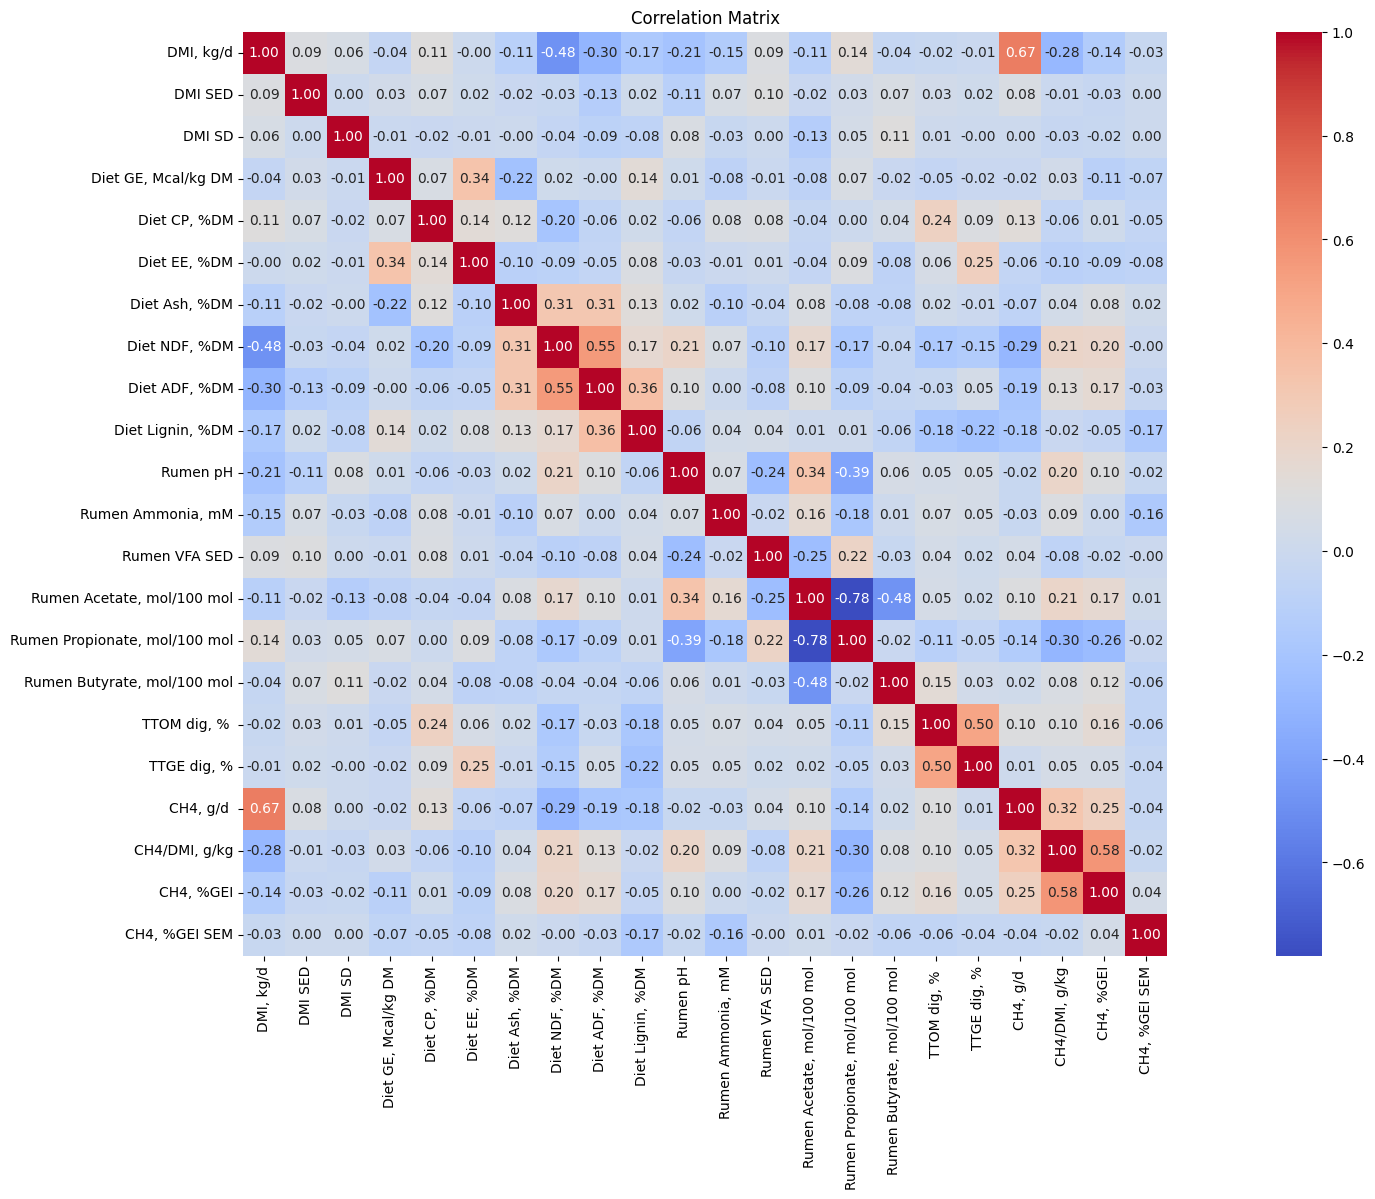

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only float64 columns
numerical_df = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(28, 12))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Set title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [50]:
df.columns

Index(['Animal ID', 'Study Location', 'Animal sex: 1 = Male; 2= Female',
       'Animal Age (months)', 'Animal BW, kg', 'Methane Measurement Method',
       'DIM', 'ADG, kg/d ', 'Supplemental Feed Ingredients', 'DMI, kg/d',
       'DMI SEM', 'DMI SED', 'DMI SD', 'Diet GE, Mcal/kg DM', 'Diet CP, %DM',
       'Diet EE, %DM', 'Diet Ash, %DM', 'Diet NDF, %DM', 'Diet ADF, %DM',
       'Diet Lignin, %DM', 'Diet Starch, %DM', 'Rumen pH', 'Rumen Ammonia, mM',
       'Rumen VFA SED', 'Rumen Acetate, mol/100 mol',
       'Rumen Propionate, mol/100 mol', 'Rumen Butyrate, mol/100 mol',
       'TTOM dig, % ', 'TTGE dig, %', 'CH4, g/d ', 'CH4 SEM', 'CH4/DMI, g/kg',
       'CH4, %GEI', 'CH4, %GEI SEM', 'CH4/Milk, g/kg'],
      dtype='object')

In [51]:
df.to_csv('DairyMethane cleaned Dataset.csv', index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


**## STEP 4: LOADING THE CLEANED DATASET**

In [52]:
df=pd.read_csv('DairyMethane cleaned Dataset.csv')
df.head()

,Animal ID,Study Location,Animal sex: 1 = Male; 2= Female,Animal Age (months),"Animal BW, kg",Methane Measurement Method,DIM,"ADG, kg/d",Supplemental Feed Ingredients,"DMI, kg/d",...,"Rumen Propionate, mol/100 mol","Rumen Butyrate, mol/100 mol","TTOM dig, %","TTGE dig, %","CH4, g/d",CH4 SEM,"CH4/DMI, g/kg","CH4, %GEI","CH4, %GEI SEM","CH4/Milk, g/kg"
0,1,United States,2,,672,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",26.9,...,24.47,11.05,66.5,69.519632,300.0,33.12,20.113528,6.069369,0.302333,
1,2,United States,2,,665,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",20.0,...,25.91,11.95,68.6,69.519632,290.4,33.12,20.113528,6.069369,0.302333,
2,3,United States,2,,661,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",25.7,...,24.98,11.75,68.4,69.519632,312.0,33.12,20.113528,6.069369,0.302333,
3,4,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.7,...,23.07,10.74,64.0,69.519632,748.8,197.04,20.113528,6.069369,0.302333,
4,5,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.0,...,22.03,11.25,64.0,69.519632,451.2,197.04,20.113528,6.069369,0.302333,


## Merging the climate dataset with the cleaned methane emmision dataset

In [53]:
# Load your datasets
df_climate = pd.read_csv('Climate-data.csv')  # Replace with your climate dataset path
df_methane = pd.read_csv('DairyMethane cleaned Dataset.csv')  # Replace with your methane emission dataset path


In [54]:
df_methane.head()


,Animal ID,Study Location,Animal sex: 1 = Male; 2= Female,Animal Age (months),"Animal BW, kg",Methane Measurement Method,DIM,"ADG, kg/d",Supplemental Feed Ingredients,"DMI, kg/d",...,"Rumen Propionate, mol/100 mol","Rumen Butyrate, mol/100 mol","TTOM dig, %","TTGE dig, %","CH4, g/d",CH4 SEM,"CH4/DMI, g/kg","CH4, %GEI","CH4, %GEI SEM","CH4/Milk, g/kg"
0,1,United States,2,,672,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",26.9,...,24.47,11.05,66.5,69.519632,300.0,33.12,20.113528,6.069369,0.302333,
1,2,United States,2,,665,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",20.0,...,25.91,11.95,68.6,69.519632,290.4,33.12,20.113528,6.069369,0.302333,
2,3,United States,2,,661,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",25.7,...,24.98,11.75,68.4,69.519632,312.0,33.12,20.113528,6.069369,0.302333,
3,4,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.7,...,23.07,10.74,64.0,69.519632,748.8,197.04,20.113528,6.069369,0.302333,
4,5,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.0,...,22.03,11.25,64.0,69.519632,451.2,197.04,20.113528,6.069369,0.302333,


In [55]:
df_climate.head()

,#,Name,Average Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm),Pressure (hPa)
0,1,United States,12.5,55,20.4,3.6,1015
1,2,Netherlands,9.5,78,15.1,4.8,1018
2,3,Canada,-5.6,65,18.2,2.2,1020
3,4,Italy,14.2,60,12.3,0.8,1012
4,5,Japan,15.5,70,25.5,5.6,1013


In [56]:
# Merge the datasets on the 'Study Location' column
merged_df = pd.merge(df_methane, df_climate, how='inner', left_on='Study Location', right_on='Name')




In [57]:
df.head()

,Animal ID,Study Location,Animal sex: 1 = Male; 2= Female,Animal Age (months),"Animal BW, kg",Methane Measurement Method,DIM,"ADG, kg/d",Supplemental Feed Ingredients,"DMI, kg/d",...,"Rumen Propionate, mol/100 mol","Rumen Butyrate, mol/100 mol","TTOM dig, %","TTGE dig, %","CH4, g/d",CH4 SEM,"CH4/DMI, g/kg","CH4, %GEI","CH4, %GEI SEM","CH4/Milk, g/kg"
0,1,United States,2,,672,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",26.9,...,24.47,11.05,66.5,69.519632,300.0,33.12,20.113528,6.069369,0.302333,
1,2,United States,2,,665,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",20.0,...,25.91,11.95,68.6,69.519632,290.4,33.12,20.113528,6.069369,0.302333,
2,3,United States,2,,661,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",25.7,...,24.98,11.75,68.4,69.519632,312.0,33.12,20.113528,6.069369,0.302333,
3,4,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.7,...,23.07,10.74,64.0,69.519632,748.8,197.04,20.113528,6.069369,0.302333,
4,5,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.0,...,22.03,11.25,64.0,69.519632,451.2,197.04,20.113528,6.069369,0.302333,


In [58]:
merged_df.head()

,Animal ID,Study Location,Animal sex: 1 = Male; 2= Female,Animal Age (months),"Animal BW, kg",Methane Measurement Method,DIM,"ADG, kg/d",Supplemental Feed Ingredients,"DMI, kg/d",...,"CH4, %GEI","CH4, %GEI SEM","CH4/Milk, g/kg",#,Name,Average Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm),Pressure (hPa)
0,1,United States,2,,672,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",26.9,...,6.069369,0.302333,,1,United States,12.5,55,20.4,3.6,1015
1,2,United States,2,,665,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",20.0,...,6.069369,0.302333,,1,United States,12.5,55,20.4,3.6,1015
2,3,United States,2,,661,Sulfur Hexafluoride (SF6) tracer technique,95,,"Corn, Canola, Whole Soybeans, Cookie, Cottonse...",25.7,...,6.069369,0.302333,,1,United States,12.5,55,20.4,3.6,1015
3,4,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.7,...,6.069369,0.302333,,1,United States,12.5,55,20.4,3.6,1015
4,5,United States,2,49,640,Sulfur Hexafluoride (SF6) tracer technique,80,,corn ground/canola meal/Bakery/Cottonseed Hull...,26.0,...,6.069369,0.302333,,1,United States,12.5,55,20.4,3.6,1015


In [61]:
merged_df.drop(['#'], axis=1, inplace=True)

In [62]:
merged_df.shape

(695, 41)

In [65]:
merged_df.to_csv('DairyMethane merged Dataset.csv', index=False)

print("Dataset saved successfully!")


Dataset saved successfully!


In [66]:
merged_df.isnull().sum()

Animal ID                          0
Study Location                     0
Animal sex: 1 = Male; 2= Female    0
Animal Age (months)                0
Animal BW, kg                      0
Methane Measurement Method         0
DIM                                0
ADG, kg/d                          0
Supplemental Feed Ingredients      0
DMI, kg/d                          0
DMI SEM                            0
DMI SED                            0
DMI SD                             0
Diet GE, Mcal/kg DM                0
Diet CP, %DM                       0
Diet EE, %DM                       0
Diet Ash, %DM                      0
Diet NDF, %DM                      0
Diet ADF, %DM                      0
Diet Lignin, %DM                   0
Diet Starch, %DM                   0
Rumen pH                           0
Rumen Ammonia, mM                  0
Rumen VFA SED                      0
Rumen Acetate, mol/100 mol         0
Rumen Propionate, mol/100 mol      0
Rumen Butyrate, mol/100 mol        0
T

In [67]:
hidden_nulls = merged_df.isin(['', 'NA', 'N/A', '-', 'null', ' '])  # Add more as necessary
print(hidden_nulls.sum()) 

Animal ID                            0
Study Location                       0
Animal sex: 1 = Male; 2= Female      0
Animal Age (months)                583
Animal BW, kg                        2
Methane Measurement Method           0
DIM                                  9
ADG, kg/d                          661
Supplemental Feed Ingredients        0
DMI, kg/d                            0
DMI SEM                              2
DMI SED                              0
DMI SD                               0
Diet GE, Mcal/kg DM                  0
Diet CP, %DM                         0
Diet EE, %DM                         0
Diet Ash, %DM                        0
Diet NDF, %DM                        0
Diet ADF, %DM                        0
Diet Lignin, %DM                     0
Diet Starch, %DM                     1
Rumen pH                             0
Rumen Ammonia, mM                    0
Rumen VFA SED                        0
Rumen Acetate, mol/100 mol           0
Rumen Propionate, mol/100

In [68]:
# Strip whitespace and check for empty strings
stripped_df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
print(stripped_df.isin(['']).sum())  # Count of empty strings after stripping whitespace


Animal ID                            0
Study Location                       0
Animal sex: 1 = Male; 2= Female      0
Animal Age (months)                672
Animal BW, kg                        2
Methane Measurement Method           0
DIM                                  9
ADG, kg/d                          750
Supplemental Feed Ingredients        0
DMI, kg/d                            0
DMI SEM                              2
DMI SED                              0
DMI SD                               0
Diet GE, Mcal/kg DM                  0
Diet CP, %DM                         0
Diet EE, %DM                         0
Diet Ash, %DM                        0
Diet NDF, %DM                        0
Diet ADF, %DM                        0
Diet Lignin, %DM                     0
Diet Starch, %DM                     1
Rumen pH                             0
Rumen Ammonia, mM                    0
Rumen VFA SED                        0
Rumen Acetate, mol/100 mol           0
Rumen Propionate, mol/100

C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\796249.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stripped_df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [69]:
import numpy as np

# Replace common markers of missing values with np.nan
merged_df.replace(['', ' ', 'NA', 'N/A', '-', 'null'], np.nan, inplace=True)


In [71]:
merged_df.isnull().sum()

Animal ID                            0
Study Location                       0
Animal sex: 1 = Male; 2= Female      0
Animal Age (months)                583
Animal BW, kg                        2
Methane Measurement Method           0
DIM                                  9
ADG, kg/d                          661
Supplemental Feed Ingredients        0
DMI, kg/d                            0
DMI SEM                              2
DMI SED                              0
DMI SD                               0
Diet GE, Mcal/kg DM                  0
Diet CP, %DM                         0
Diet EE, %DM                         0
Diet Ash, %DM                        0
Diet NDF, %DM                        0
Diet ADF, %DM                        0
Diet Lignin, %DM                     0
Diet Starch, %DM                     1
Rumen pH                             0
Rumen Ammonia, mM                    0
Rumen VFA SED                        0
Rumen Acetate, mol/100 mol           0
Rumen Propionate, mol/100

In [72]:
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(merged_df[numerical_cols].mean())

In [73]:
merged_df[categorical_cols] = merged_df[categorical_cols].fillna(merged_df[categorical_cols].mode().iloc[0])

In [74]:
merged_df.isnull().sum()

Animal ID                          0
Study Location                     0
Animal sex: 1 = Male; 2= Female    0
Animal Age (months)                0
Animal BW, kg                      0
Methane Measurement Method         0
DIM                                0
ADG, kg/d                          0
Supplemental Feed Ingredients      0
DMI, kg/d                          0
DMI SEM                            0
DMI SED                            0
DMI SD                             0
Diet GE, Mcal/kg DM                0
Diet CP, %DM                       0
Diet EE, %DM                       0
Diet Ash, %DM                      0
Diet NDF, %DM                      0
Diet ADF, %DM                      0
Diet Lignin, %DM                   0
Diet Starch, %DM                   0
Rumen pH                           0
Rumen Ammonia, mM                  0
Rumen VFA SED                      0
Rumen Acetate, mol/100 mol         0
Rumen Propionate, mol/100 mol      0
Rumen Butyrate, mol/100 mol        0
T

In [ ]:
merged_df.to_csv('methane final.csv', index=False)

print("Dataset saved successfully!")
